<a href="https://colab.research.google.com/github/zilves27/PUC/blob/main/PUC_MVP_Sprint_II_ML_Valor_Chapa_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MVP 2 - Machine Learning - Valor Chapa/KG***

# ***1 - Definição do problema***

O problema consiste em realizar uma análise, para tentar entender, se há, e quais seriam, os atributos que mais podem impactar no valor do KG da chapa de aço para uma indústria. A escolha foi devido ao fato de que o item em questão (chapa de aço) é um dos principais componentes utilizados na fabricação dos equipamentos, representando algo em torno de 30% do volume de compras da empresa. Com uma grande representatividade no volume de aquisição de materiais, entender variáveis que mais podem influenciar na formação do preço do item em questão tornam-se essenciais para traçar uma estratégia para os próximos períodos.

De forma técnica a ideia foi realizar a análise de regressão para entender o valor da variável "CHAPA (KG)", com base em um conjunto de atributos numéricos. O objetivo era encontrar um modelo que fosse capaz de fazer previsões para auxílio na tomada de decisões.

O dataset conta com a seleção de 13 atributos, todos escolhidos tecnicamente, sendo 7 deles como comum de mercado, como IPCA, IGPM, Selic, USD, Petróleo, Gás e Energia, outros 5 que servem como matéria-prima para fabricação das chapas de aço, como Minério de Ferro, Cobre, Níquel, Alumínio e Zinco, além de mais 1 como um especulador e balizador, nesse caso a Bobina de aço. Todos esses foram considerados como variáveis X, contra a variável Y, nesse caso Chapa. Abaixo detalhes do que representa cada uma das variáveis:
    
    DATA – informa qual o período de apuração dos dados;
    IPCA L12M – trata-se do Índice nacional de Preços ao Consumidor Amplo acumulado dos últimos 12 meses. Esse índice considera qual o valor médio para aquisição de uma “cesta”, composta de bens e serviços utilizados pela população em geral, sendo um índice de inflação;
    IGPM L12M – trata-se do Índice Geral de Preços Mercado, que como definição da própria empresa que elabora o índice diz que “O indicador foi concebido no final dos anos de 1940 para ser uma medida abrangente do movimento de preços, que englobasse não apenas diferentes atividades como também etapas distintas do processo produtivo”, sendo esse outro índice de inflação;
    SELIC – taxa básica de juros da economia, na qual é definida em assembleia pelo Copom (Comitê de Política Monetária do Banco Central) a cada 45 dias. Nesse caso como os dados do início do mês foram considerados como sendo o dado preenchido no arquivo;
    USD – esse é o valor da Taxa do Dólar dos Estados Unidos (USD) x Real do Brasil (R$ - BRL). No Brasil é adotado um câmbio flutuante e com isso temos ajustes e variações diárias do item. Para esse também foi considerado o valor de abertura do item no primeiro dia útil do mês;
    MINERIO DE FERRO – o minério de ferro é um item que serve de matéria prima para fabricação do item analisado (chapa de aço). Por ser uma commodity é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    BOBINA ACO – trata-se de uma ativo também negociado na bolsa e mesmo tendo características técnicas diferentes do produto analisado (chapa de aço), poderia ser um item com dados de mercado;
    COBRE – o cobre é um item que serve de matéria prima para fabricação do item analisado (chapa de aço). Por ser uma commodity é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    NIQUEL – o níquel é um item que serve de matéria prima para fabricação do item analisado (chapa de aço). Por ser uma commodity é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    ALUMINIO – o alumínio é um item que serve de matéria prima para fabricação do item analisado (chapa de aço). Por ser uma commodity é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    ZINCO – o zinco é um item que serve de matéria prima para fabricação do item analisado (chapa de aço). Por ser uma commodity é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    PETROLEO BRENT – o petróleo não serve como como matéria prima direta para fabricação, porém tem sua utilização ao longo das diversas etapas para produção do produto analisado (chapa de aço), como servindo de insumo para alimentação das máquinas ou até mesmo como sendo combustível para transporte. Esse é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    GAS NATURAL – o gás natural não serve como como matéria prima direta para fabricação, porém tem sua utilização ao longo das diversas etapas para produção do produto analisado (chapa de aço), como servindo de insumo para alimentação das máquinas ou até mesmo como sendo combustível para transporte. Esse é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês;
    ENERGIA ELETRICA – esse é um item utilizado ao longo de toda cadeia de produção. Esse é um dos ativos negociados na bolsa e o valor considerado é o de abertura do item no primeiro dia útil do mês
    CHAPA (KG) – chapa de aço com o valor médio mensal pago pelo item

A maioria dos dados foram extraídos do site Investing.com, que é uma das referências no assunto, além de ser muito utilizado para esse tipo de pesquisa. Fora do site mencionado foram extraídos os dados de IPCA do IBGE, IGPM da FGV, USD e Selic do Banco Central do Brasil, são as respectivas instituições nas quais “controlam” os respectivos indicadores, e os valores da chapa foram dados adquiridos junto a própria empresa. Apenas destacando que os valores disponibilizados pela empresa não são sensíveis, sendo passíveis de inclusão no projeto sem qualquer tipo de punições, pois não mostram qualquer tipo de características técnica do item. Com os dados extraídos, os mesmos foram consolidados em um único arquivo e estão dispostos de forma mensal, sendo considerados a partir de janeiro de 2019. O porquê disso se deve ao fato de que posterior a essa data os dados de negociação do mercado existem, porém não em consolidadores nos quais se possa confiar. Com isso, o melhor foi trabalhar com uma base mais enxuta, porém com valores que realmente são confiáveis.


In [10]:
pip install pandas seaborn statsmodels


In [11]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import r2_score


# ***2 - Preparação dos dados***

Os dados foram carregados através de um arquivo CSV, disponibilizados para conferência no próprio Github através da URL presente no código.

A base foi separada em 80% treino e 20% teste com o “train_test_split”, com aplicação da validação cruzada, uma vez que a base possui um número relativamente baixo de dados temporais e a validação auxilia para evitar problemas de viés na avaliação do modelo e fornecer uma estimativa mais precisa do desempenho do mesmo em dados não vistos.

Os dados de treinamento foram divididos em “10 folds” para realização da validação cruzada


In [12]:
# Carregar os dados do arquivo CSV
url = "https://raw.githubusercontent.com/zilves27/PUC/main/chapa.csv"
df = pd.read_csv(url)
df = pd.read_csv(url, delimiter=';')

# Visualizar as primeiras linhas do DataFrame
print(df.head())

     DATA  IPCA L12M  IGPM L12M  SELIC L12M     USD  MINERIO FERRO  \
0  jan/19     0.0378     0.0659       0.064  3.6439          76.03   
1  fev/19     0.0389     0.0740       0.064  3.7511          87.33   
2  mar/19     0.0458     0.0802       0.064  3.9238          85.70   
3  abr/19     0.0494     0.0837       0.064  3.9207          93.24   
4  mai/19     0.0466     0.0744       0.064  3.9218          98.76   

   BOBINA ACO   COBRE  NIQUEL  ALUMINIO  ZINCO  PETROLEO BRENT  GAS NATURAL  \
0         694  2.7890   12480      2332   2719           61.89        2.814   
1         714  2.9480   13050      2225   2778           66.03        2.812   
2         697  2.9395   12984      2225   2923           68.39        2.662   
3         654  2.9040   12201      2225   2825           72.80        2.575   
4         584  2.6405   12017      2225   2524           64.49        2.454   

   ENERGIA ELETRICA  CHAPA (KG)  
0           55793.1      4.3496  
1           55826.5      4.3497  
2 

In [13]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,1:14] # atributos
y = array[:,14] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

# ***3 - Modelagem e Treinamento***

Para análise desse processo foram utilizados alguns modelos de regressão, incluindo regressão linear (Linear Regression), Ridge Regression, Lasso Regression, K-Nearest Neighbors Regressor (KNN), Decision Tree Regressor (CART) e Support Vector Regressor (SVR). Os modelos foram avaliados utilizando validação cruzada e a métrica de erro médio quadrático (MSE) foi utilizada como medida de desempenho nos dados de teste, sendo a comparação dos resultados de diferentes modelos visualizadas através de um boxplot.

Além disso foi utilizada a técnica de correlação, avaliando os atributos da variável “X” em relação a variável alvo “Y” (CHAPA KG) em toda a base de dados, além da visualização através do gráfico de dispersão. Após aplicou-se a Regressão Linear nos atributos da variável “X”.

Para avaliar quais seriam os atributos mais relevantes para análise, utilizou-se o método "SelectKBest" para selecionar os 5 atributos nos quais apresentaram a melhor correlação com os dados de toda a base para uma comparação futura.

A base de treino contendo 80% dos itens foi trabalhada com aplicação da Regressão Linear e depois Correlação, para posterior seleção dos 5 atributos mais impactantes no resultado da base de teste e uma comparação com os da base total. Nesse caso foi possível verificar que o atributo “ALUMINIO” da variável “X” estava presente na análise da base total, porém na base de treino ele foi substituído pelo atributo “PETROLEO BRENT”.


***Modelagem***

LR: MSE 1.27 (1.15) - RMSE 1.13
Ridge: MSE 1.58 (1.02) - RMSE 1.26
Lasso: MSE 2.19 (1.21) - RMSE 1.48
KNN: MSE 1.75 (0.78) - RMSE 1.32
CART: MSE 2.58 (2.56) - RMSE 1.61
SVM: MSE 4.86 (1.89) - RMSE 2.20
SVM: MSE 4.86 (1.89) - RMSE 2.20


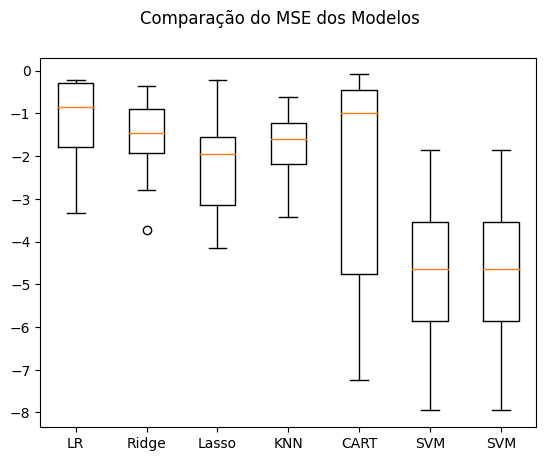

In [14]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
# Verificar a correlação entre as colunas numéricas e "CHAPA (KG)"
correlation_matrix = df.corr()
print(correlation_matrix['CHAPA (KG)'])

IPCA L12M           0.853782
IGPM L12M           0.216926
SELIC L12M          0.623102
USD                 0.486881
MINERIO FERRO       0.364110
BOBINA ACO          0.608405
COBRE               0.818978
NIQUEL              0.815646
ALUMINIO            0.795291
ZINCO               0.798267
PETROLEO BRENT      0.777771
GAS NATURAL         0.741294
ENERGIA ELETRICA    0.639051
CHAPA (KG)          1.000000
Name: CHAPA (KG), dtype: float64


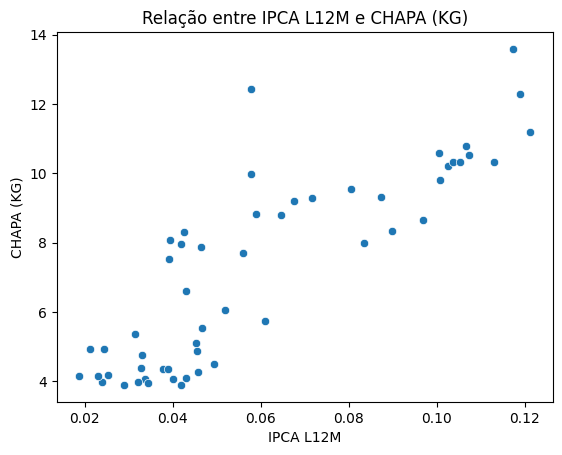

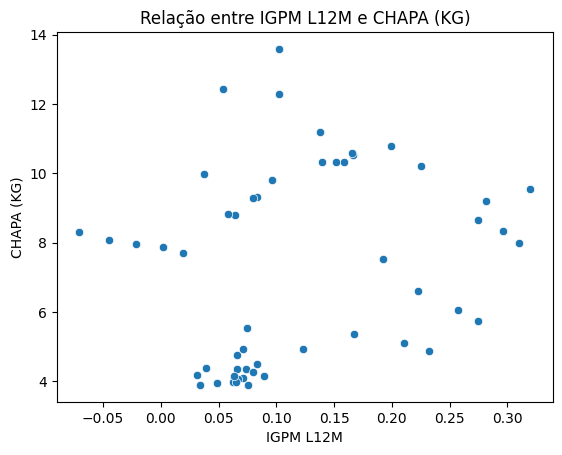

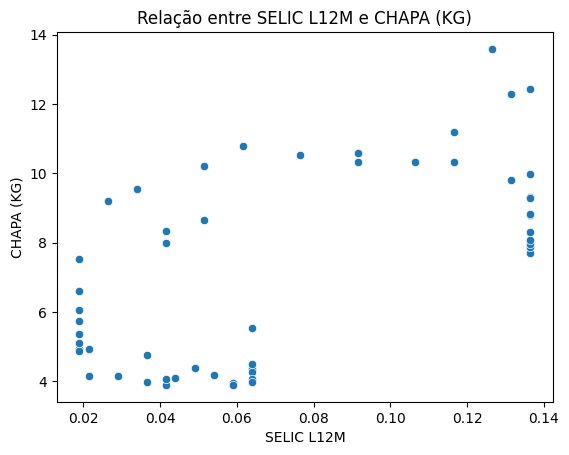

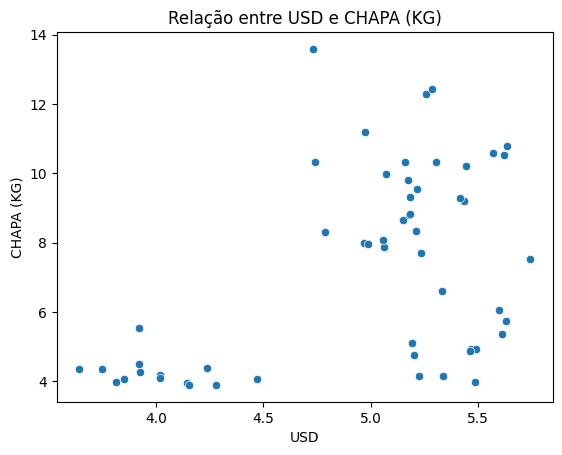

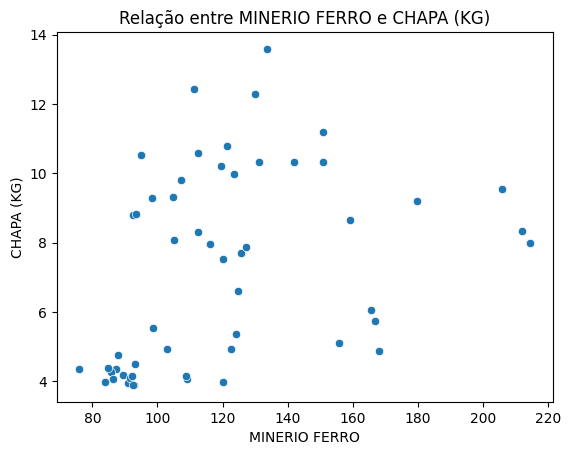

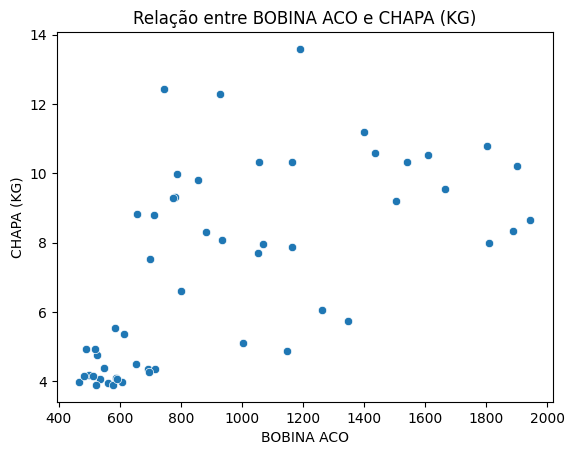

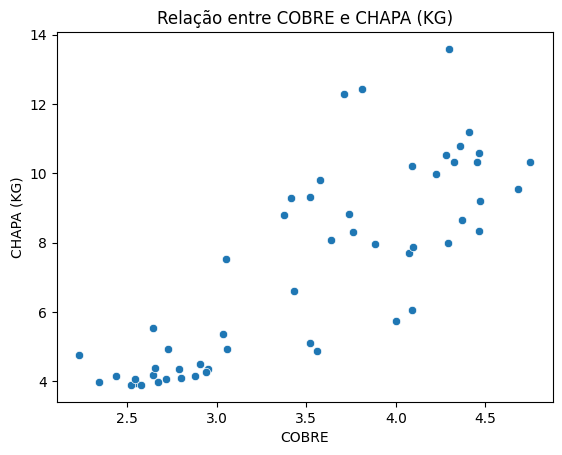

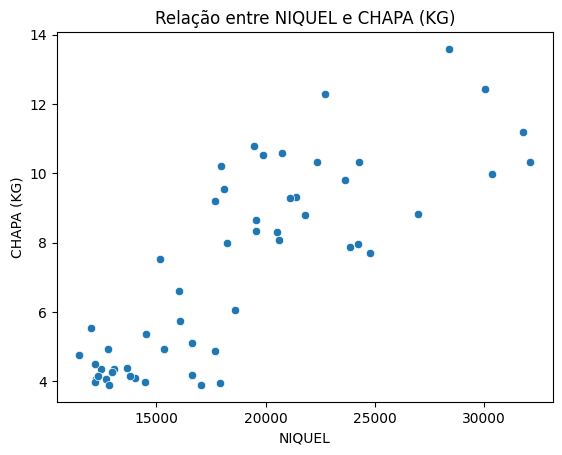

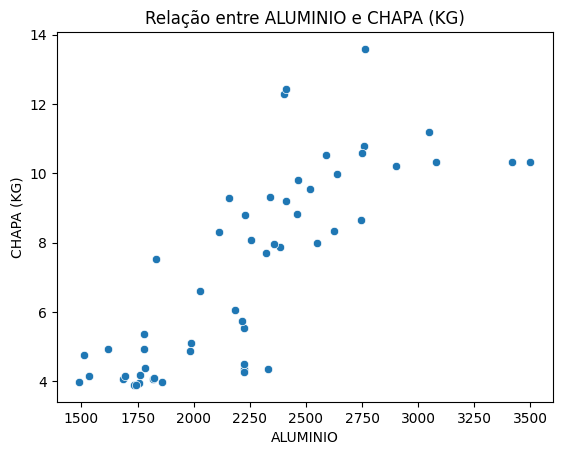

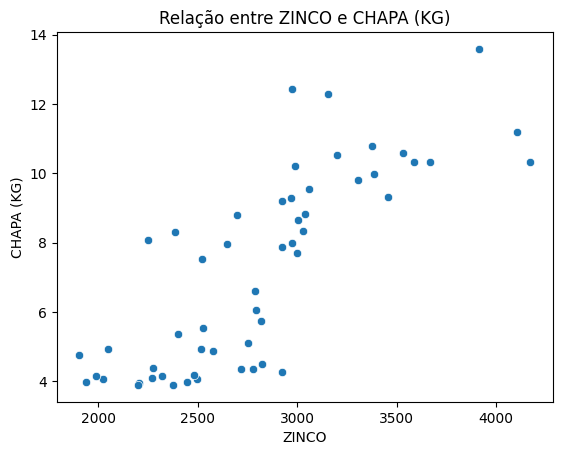

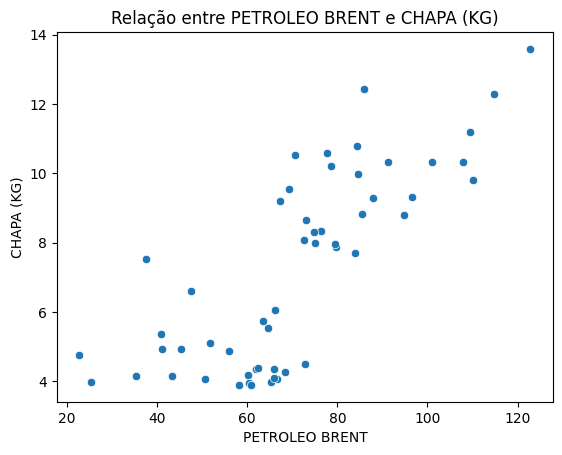

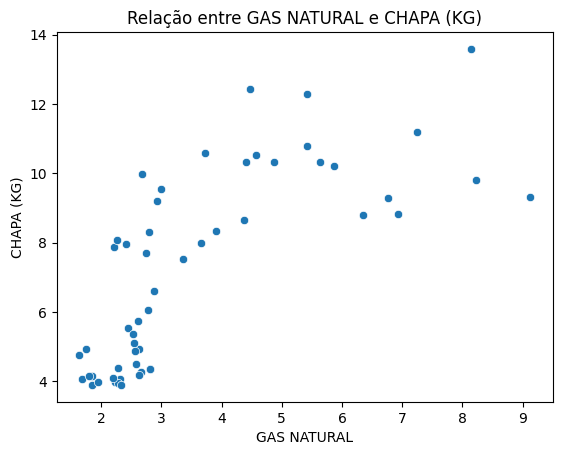

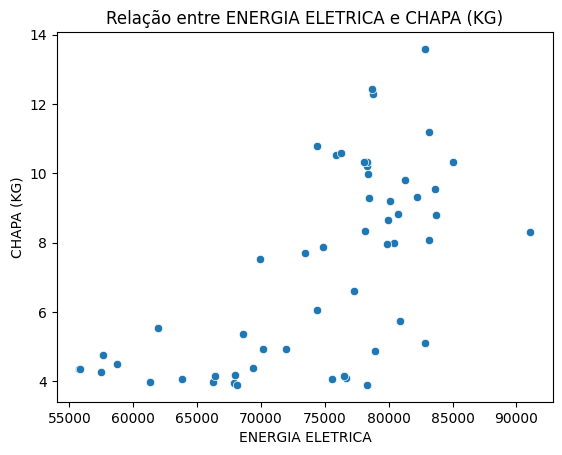

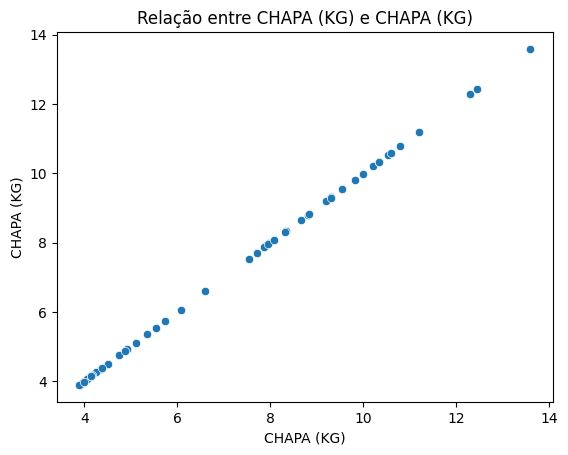

In [16]:
# Plotar gráficos de dispersão entre as colunas numéricas e "CHAPA (KG)"
for col in correlation_matrix:
    sns.scatterplot(data=df, x=col, y='CHAPA (KG)')
    plt.xlabel(col)
    plt.ylabel('CHAPA (KG)')
    plt.title(f'Relação entre {col} e CHAPA (KG)')
    plt.show()

In [17]:
# Selecionar apenas as colunas numéricas (excluindo a coluna "CHAPA (KG)")
numeric_columns = df.select_dtypes(include=[float, int]).columns.tolist()
numeric_columns.remove('CHAPA (KG)')

print(numeric_columns)

['IPCA L12M', 'IGPM L12M', 'SELIC L12M', 'USD', 'MINERIO FERRO', 'BOBINA ACO', 'COBRE', 'NIQUEL', 'ALUMINIO', 'ZINCO', 'PETROLEO BRENT', 'GAS NATURAL', 'ENERGIA ELETRICA']


In [18]:
# Realizar a regressão linear usando a biblioteca statsmodels
X = df[numeric_columns]
y = df['CHAPA (KG)']
X = sm.add_constant(X)  # Adicionar uma coluna constante para o termo independente
model = sm.OLS(y, X).fit()

# Imprimir os resultados da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CHAPA (KG)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     39.43
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.19e-18
Time:                        23:41:29   Log-Likelihood:                -60.870
No. Observations:                  54   AIC:                             149.7
Df Residuals:                      40   BIC:                             177.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3810      3.326  

In [19]:
# Aplicar a seleção de características utilizando o método SelectKBest com base na regressão
num_features_to_select = 5  # Defina o número de características que deseja selecionar
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_new = selector.fit_transform(X, y)

In [20]:
# Obter as colunas selecionadas
selected_columns = X.columns[selector.get_support()].tolist()

# Imprimir as colunas selecionadas
print("Colunas mais influentes:")
print(selected_columns)

Colunas mais influentes:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ALUMINIO', 'ZINCO']


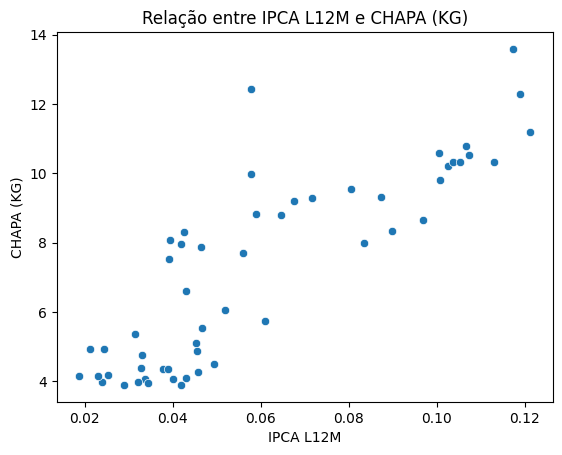

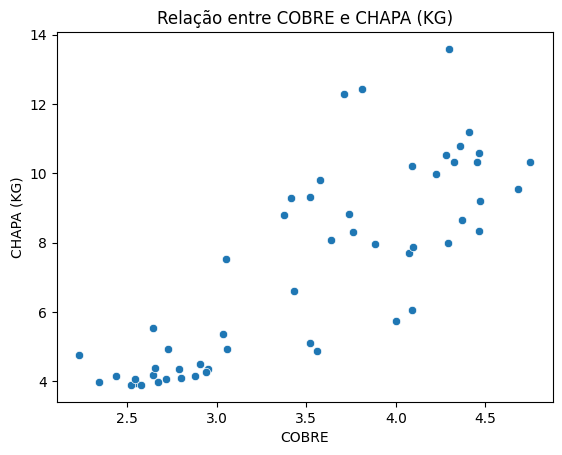

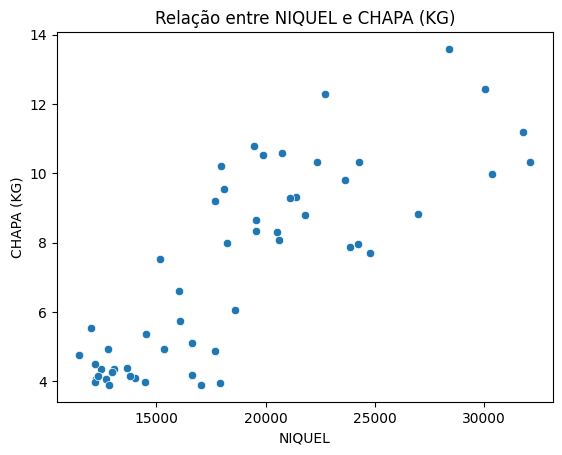

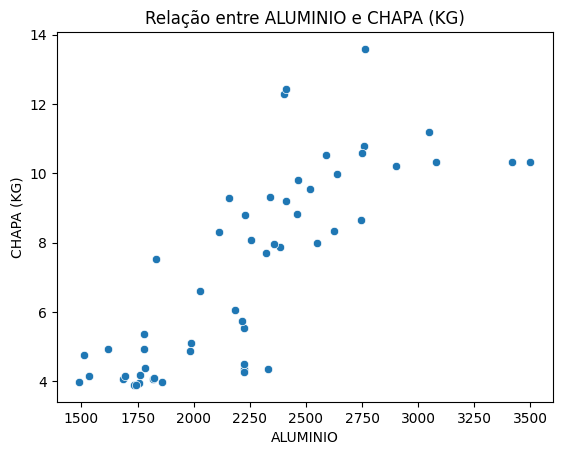

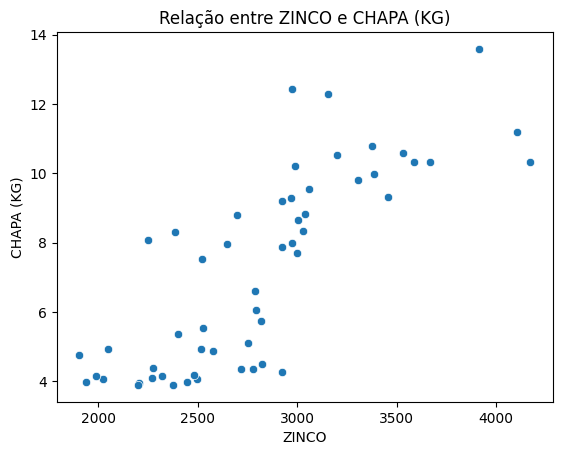

In [21]:
# Realizar gráficos de dispersão para as colunas selecionadas
for col in selected_columns:
    sns.scatterplot(data=df, x=col, y='CHAPA (KG)')
    plt.xlabel(col)
    plt.ylabel('CHAPA (KG)')
    plt.title(f'Relação entre {col} e CHAPA (KG)')
    plt.show()

***Treinando os dados***



In [22]:
# Dados separados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Realizar a regressão linear nos dados de treinno
model_train = sm.OLS(y_train, X_train).fit()

In [24]:
# Imprimir os resultados da regressão nos dados de treino
print("Resultados da regressão nos dados de treino:")
print(model_train.summary())

Resultados da regressão nos dados de treino:
                            OLS Regression Results                            
Dep. Variable:             CHAPA (KG)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     29.36
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           3.54e-13
Time:                        23:41:30   Log-Likelihood:                -48.738
No. Observations:                  43   AIC:                             125.5
Df Residuals:                      29   BIC:                             150.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [25]:
# Calcular a correlação na base de treino
correlation_with_chapa = X_train.corrwith(y_train)

# Imprimir a correlação da base de treino
print(correlation_with_chapa)

const                    NaN
IPCA L12M           0.869079
IGPM L12M           0.209994
SELIC L12M          0.628747
USD                 0.456061
MINERIO FERRO       0.342487
BOBINA ACO          0.577381
COBRE               0.796643
NIQUEL              0.814008
ALUMINIO            0.778783
ZINCO               0.807309
PETROLEO BRENT      0.782278
GAS NATURAL         0.744359
ENERGIA ELETRICA    0.649088
dtype: float64


In [26]:
# Aplicar a seleção de características utilizando o método SelectKBest com base na regressão na base treino
num_features_to_select1 = 5  # Defina o número de características que deseja selecionar
selector = SelectKBest(score_func=f_regression, k=num_features_to_select1)
X_new1 = selector.fit_transform(X_train, y_train)

In [27]:
# Obter as colunas selecionadas da base treino
selected_columns1 = X_train.columns[selector.get_support()].tolist()

# Imprimir e comparar as colunas selecionadas base treino
print("Colunas mais influentes treino:")
print(selected_columns1)

Colunas mais influentes treino:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ZINCO', 'PETROLEO BRENT']


In [28]:
# Comparação das colunas selecionadas base treino x base total
print("Colunas mais influentes treino:")
print(selected_columns1)

print("Colunas mais influentes total:")
print(selected_columns)

Colunas mais influentes treino:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ZINCO', 'PETROLEO BRENT']
Colunas mais influentes total:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ALUMINIO', 'ZINCO']


# ***4 - Resultados***

A base de teste contendo 20% dos itens foi trabalhada da mesma forma que a base de treino. Ao gerar a nova correlação foi possível identificar que o atributo “ALUMINIO” da variável “X” voltou a ser um dos de maior destaque, porém dessa vez quem saiu foi o atributo “ZINCO”.

Não foram observados problemas de overfitting.

Ao final, os resultados dos modelos foram avaliados utilizando métricas de erro como MSE, RMSE e MAE, bem como o coeficiente de determinação (R²) para medir a qualidade das previsões. Com os seguintes resultados:

Erro Médio Quadrático (MSE) nos dados de teste: 1.1212770095573068.
    Isso mostra que em média o valor previsto no modelo pode sofrer uma variação de R$ 1,21. De certo modo o valor pode ser considerado alto, porém ao analisar os números das bases vemos que essa média foi muito influenciado por duas linhas. Todavia, mais uma vez ressaltando que por se tratar de um modelo com poucas amostras ainda, qualquer número pode causar grande impacto no resultado.

Raiz do Erro Médio Quadrático (RMSE) nos dados de teste 1.0589036828518952.
    Isso mostra que o valor cai por se tratar de uma métrica na qual penaliza os outliers, como destacado acima. Com o tempo haverá novos dados e isso irá se ajustando.

Erro Médio Absoluto (MAE): 0.6997186515700484.
    Essa métrica representa a média dos erros absolutos, ou seja, a média das diferenças em valor absoluto entre as previsões do modelo e os valores reais da variável. Ele é importante pois não considera a magnitude do erro ao quadrado, como no caso do MSE e RMSE. Isso significa que os outliers têm um peso semelhante aos demais erros na métrica, tornando o MAE mais robusto a essas situações.

Coeficiente de Determinação (R²): 0.8110734973317999.
    Isso indica que aproximadamente 81.11% da variabilidade dos dados de teste da variável “Y” pode ser explicada pelas variáveis atributos do modelo, podendo assim ser considerada como bom.

Dos 13 atributos analisados, 3 deles (“IPCA L12M”, “COBRE” e “NIQUEL”) apresentaram correlação forte ao longo de todo o processo e estando presente em toda as bases trabalhadas (total, treino e teste). Outros 3 (“ALUMINIO”, “ZINCO” e “PETROLEO BRENT”) apareceram em 2 das 3 bases analisadas. Como em ambos os casos todos atributos apresentaram correlação acima de 0.75, o que significa que é uma correlação forte, para as previsões e análises da empresa serão considerados todas os 6 atributos (“IPCA L12M”, “COBRE”, “NIQUEL”, “ALUMINIO”, “ZINCO” e “PETROLEO BRENT”) com um peso maior em detrimentos aos demais. Porém, como a base possui um número pequeno de amostras, o processo de análise deverá ser repetido constantemente, não só para uma validação, mas também para entender se há alguma mudança nas características apresentadas no mercado, uma vez que todos eles são itens que sofrem com ajustes constantes do mesmo.


***Testando os dados***

In [29]:
# Realizar a regressão linear nos dados de teste
model_test = sm.OLS(y_test, X_test).fit()

In [30]:
# Imprimir os resultados da regressão nos dados de teste
print("Resultados da regressão nos dados de teste:")
print(model_test.summary())

Resultados da regressão nos dados de teste:
                            OLS Regression Results                            
Dep. Variable:             CHAPA (KG)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                nan
Time:                        23:41:30   Log-Likelihood:                 237.83
No. Observations:                  11   AIC:                            -453.7
Df Residuals:                       0   BIC:                            -449.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [31]:
# Calcular a correlação na base de teste
correlation_with_chapa1 = X_test.corrwith(y_test)

# Imprimir a correlação da base de teste
print(correlation_with_chapa1)

const                    NaN
IPCA L12M           0.753680
IGPM L12M           0.083399
SELIC L12M          0.686309
USD                 0.619972
MINERIO FERRO       0.536493
BOBINA ACO          0.716116
COBRE               0.918781
NIQUEL              0.826987
ALUMINIO            0.860183
ZINCO               0.725273
PETROLEO BRENT      0.758424
GAS NATURAL         0.692631
ENERGIA ELETRICA    0.583118
dtype: float64


In [32]:
# Aplicar a seleção de características utilizando o método SelectKBest com base na regressão na base teste
num_features_to_select2 = 5  # Defina o número de características que deseja selecionar
selector = SelectKBest(score_func=f_regression, k=num_features_to_select2)
X_new2 = selector.fit_transform(X_test, y_test)

In [33]:
# Obter as colunas selecionadas da base treino
selected_columns2 = X_test.columns[selector.get_support()].tolist()

# Imprimir e comparar as colunas selecionadas base teste
print("Colunas mais influentes treino:")
print(selected_columns2)


Colunas mais influentes treino:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ALUMINIO', 'PETROLEO BRENT']


In [34]:
# Comparação das colunas selecionadas base total x base treino x base teste
print("Colunas mais influentes total:")
print(selected_columns)

print("Colunas mais influentes treino:")
print(selected_columns1)

print("Colunas mais influentes treino:")
print(selected_columns2)

Colunas mais influentes total:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ALUMINIO', 'ZINCO']
Colunas mais influentes treino:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ZINCO', 'PETROLEO BRENT']
Colunas mais influentes treino:
['IPCA L12M', 'COBRE', 'NIQUEL', 'ALUMINIO', 'PETROLEO BRENT']


In [35]:
# Fazer previsões nos dados de teste
y_pred = model_train.predict(X_test)

# Criar um DataFrame com os valores Teste x Previsto
dfx = pd.DataFrame({'Valor Real': y_test, 'Valor Previsto': y_pred})
print(dfx)

    Valor Real  Valor Previsto
19      4.9211        4.932199
49      7.7010        9.763979
48      9.9905       10.450564
12      3.8937        3.481705
44      9.2956        9.340302
5       4.0595        4.476754
17      4.9199        4.328964
52      8.0795        7.425893
3       4.5097        4.844711
32     10.2006        7.629035
13      4.0595        4.197193


***Métrica e Acompanhamento dos Modelos***

In [36]:
# Calcular o Erro Médio Quadrático (MSE) nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print("Erro Médio Quadrático (MSE) nos dados de teste:", mse)

Erro Médio Quadrático (MSE) nos dados de teste: 1.1212770095573068


In [37]:
# Calcular a Raiz do Erro Médio Quadrático (RMSE) nos dados de teste
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Raiz do Erro Médio Quadrático (RMSE) nos dados de teste", rmse)


Raiz do Erro Médio Quadrático (RMSE) nos dados de teste 1.0589036828518952


In [38]:
# Calcular o Erro Médio Absoluto (MAE) nos dados de teste
mae = mean_absolute_error(y_test, y_pred)

print("Erro Médio Absoluto (MAE):", mae)

Erro Médio Absoluto (MAE): 0.6997186515700484


In [39]:
# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_test, y_pred)

print("Coeficiente de Determinação (R²):", r2)

Coeficiente de Determinação (R²): 0.8110734973317999
